# import libraries

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

tf.random.set_seed(777)
print(tf.__version__)

2.1.0


# normalization(scale data into 0-1)

In [16]:
def normalization(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / denominator

<img src="./data/normalization.png" alt="image" style="width: 300px;" align="left"/>

# data settings

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


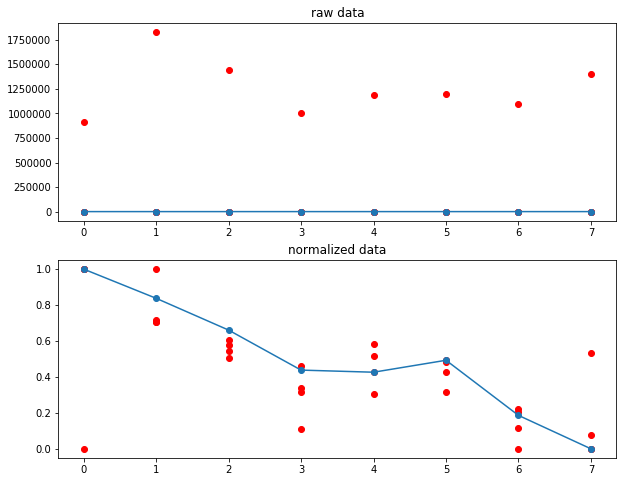

In [17]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

#before normalization
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

fig = plt.figure(figsize = (10,8))
fig.add_subplot(211)
plt.plot(x_train, 'ro') #plot with red circles
plt.plot(y_train, marker = 'o')
plt.title("raw data")

#after normalization
xy = normalization(xy)
print(xy)

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

fig.add_subplot(212)
plt.plot(x_train, 'ro')
plt.plot(y_train, marker = 'o')
plt.title("normalized data")

plt.show()

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

# weight and bias settings

In [18]:
W = tf.Variable(tf.random.normal([4, 1]), dtype = tf.float32)
b = tf.Variable(tf.random.normal([1]), dtype = tf.float32)
variables = [W, b]

# hypothesis

In [19]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

# l2 loss function

In [20]:
def l2_loss(loss, beta = 0.01):
    W_reg = tf.nn.l2_loss(W) # output = sum(W ** 2) / 2
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

<img src="./data/l2lossfn.png" alt="image" style="width: 300px;" align="left"/>

# cost function(mse)

In [21]:
def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

# learning rate decay 
* initial_learning_rate
* decay_steps
* decay_rate
* staircase

from : https://www.tensorflow.org/guide/keras/train_and_evaluate

In [22]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = 0.1,
                                                          decay_steps = 100,
                                                          decay_rate = 0.96,
                                                          staircase = True)
    
if(True):
    optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate = initial_learning_rate)

# cost minimization

In [23]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features), features, labels)
    return tape.gradient(loss_value, variables), loss_value

# train

In [24]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        
        grads, loss_value = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars = zip(grads, variables))
        if step % 10 == 0:
            print("Iter: {}, Loss: {:.4f}, Learning Rate: {:.8f}".format(step, loss_value, optimizer._decayed_lr(('float32'))))

Iter: 0, Loss: 1.7346, Learning Rate: 0.10000000
Iter: 10, Loss: 0.0745, Learning Rate: 0.10000000
Iter: 20, Loss: 0.0438, Learning Rate: 0.10000000
Iter: 30, Loss: 0.0273, Learning Rate: 0.10000000
Iter: 40, Loss: 0.0181, Learning Rate: 0.10000000
Iter: 50, Loss: 0.0128, Learning Rate: 0.10000000
Iter: 60, Loss: 0.0098, Learning Rate: 0.10000000
Iter: 70, Loss: 0.0079, Learning Rate: 0.10000000
Iter: 80, Loss: 0.0067, Learning Rate: 0.10000000
Iter: 90, Loss: 0.0059, Learning Rate: 0.10000000
Iter: 100, Loss: 0.0054, Learning Rate: 0.09600000
Iter: 110, Loss: 0.0050, Learning Rate: 0.09600000
Iter: 120, Loss: 0.0047, Learning Rate: 0.09600000
Iter: 130, Loss: 0.0045, Learning Rate: 0.09600000
Iter: 140, Loss: 0.0044, Learning Rate: 0.09600000
Iter: 150, Loss: 0.0043, Learning Rate: 0.09600000
Iter: 160, Loss: 0.0042, Learning Rate: 0.09600000
Iter: 170, Loss: 0.0041, Learning Rate: 0.09600000
Iter: 180, Loss: 0.0041, Learning Rate: 0.09600000
Iter: 190, Loss: 0.0041, Learning Rate: 0.